# Exploratory Data Analysis with NLP Tools

In [1]:
#!pip install pandas-profiling

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
import nltk
from nltk.corpus import stopwords
from collections import Counter
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set path to cryptocurrency csv files
path = '../Data/Reddit_Comments/Cryptocurrency/'

files = os.listdir(path)

# Create list of csv file names
csv_list = []
for f in files:
    csv_list.append(f)

In [5]:
csv_list = csv_list[:-1]
csv_list

['Cryptocurrency_2021-08-07.csv',
 'Cryptocurrency_2021-08-08.csv',
 'Cryptocurrency_2021-08-09.csv',
 'Cryptocurrency_2021-08-10.csv',
 'Cryptocurrency_2021-08-11.csv',
 'Cryptocurrency_2021-08-12.csv',
 'Cryptocurrency_2021-08-13.csv',
 'Cryptocurrency_2021-08-14.csv',
 'Cryptocurrency_2021-08-15.csv',
 'Cryptocurrency_2021-08-16.csv',
 'Cryptocurrency_2021-08-17.csv',
 'Cryptocurrency_2021-08-18.csv',
 'Cryptocurrency_2021-08-19.csv',
 'Cryptocurrency_2021-08-20.csv',
 'Cryptocurrency_2021-08-21.csv',
 'Cryptocurrency_2021-08-22.csv',
 'Cryptocurrency_2021-08-23.csv',
 'Cryptocurrency_2021-08-24.csv',
 'Cryptocurrency_2021-08-25.csv',
 'Cryptocurrency_2021-08-26.csv',
 'Cryptocurrency_2021-08-27.csv',
 'Cryptocurrency_2021-08-28.csv',
 'Cryptocurrency_2021-08-29.csv',
 'Cryptocurrency_2021-08-30.csv',
 'Cryptocurrency_2021-08-31.csv',
 'Cryptocurrency_2021-09-01.csv',
 'Cryptocurrency_2021-09-02.csv',
 'Cryptocurrency_2021-09-03.csv',
 'Cryptocurrency_2021-09-04.csv',
 'Cryptocurren

## Read csv file

In [6]:
csv_list[0]

'Cryptocurrency_2021-08-07.csv'

In [7]:
df = pd.read_csv(path + csv_list[0])
df.head()

,author,author_fullname,author_premium,body,collapsed_reason_code,comment_type,created_utc,score,id,parent_id,permalink
0,HiCarumba,t2_95jx76vi,False,Yes Brother. This is the way.,NaN,NaN,1628333279,1,h81jxny,t1_h81jvaa,/r/CryptoCurrency/comments/ozr28z/it_was_proph...
1,baeiby,t2_7htt0be3,False,"Lol to be very honest, I knew close to zilch a...",NaN,NaN,1628333279,2,h81jxnr,t1_h81jn5u,/r/CryptoCurrency/comments/ozqz9m/i_trust_peop...
2,NotRyanPace,t2_xgk0k,False,"End of year, take the ""Last call for ETH under...",NaN,NaN,1628333278,1,h81jxmq,t1_h81jqki,/r/CryptoCurrency/comments/ozinnf/daily_discus...
3,BountyManagerBD,t2_8nbdzghw,False,ESCROW PROTOCOL are aiming to attract users fr...,NaN,NaN,1628333277,1,h81jxlg,t3_o2e67b,/r/CryptoCurrency/comments/o2e67b/escrow_proto...
4,Gabus_Bego,t2_bbs0wmdt,False,"Thank you, my dude.",NaN,NaN,1628333276,1,h81jxk6,t1_h81jtfb,/r/CryptoCurrency/comments/ozinnf/daily_discus...


In [8]:
df.shape

(100000, 11)

In [9]:
df.describe()

,comment_type,created_utc,score
count,0.0,1.000000e+05,100000.000000
mean,NaN,1.628359e+09,2.152550
std,NaN,2.351560e+04,8.935004
min,NaN,1.628316e+09,-38.000000
25%,NaN,1.628340e+09,1.000000
50%,NaN,1.628358e+09,1.000000
75%,NaN,1.628379e+09,2.000000
max,NaN,1.628402e+09,1381.000000


In [10]:
df.dtypes

author                    object
author_fullname           object
author_premium            object
body                      object
collapsed_reason_code     object
comment_type             float64
created_utc                int64
score                      int64
id                        object
parent_id                 object
permalink                 object
dtype: object

## Data Cleaning

In [11]:
# Identify number of duplicate rows
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 11)


In [12]:
# Remove all rows that have NaN in df['body']
df = df[df['body'].notna()]

In [13]:
df = df[df.author != "AutoModerator"]

In [14]:
df.head()

,author,author_fullname,author_premium,body,collapsed_reason_code,comment_type,created_utc,score,id,parent_id,permalink
0,HiCarumba,t2_95jx76vi,False,Yes Brother. This is the way.,NaN,NaN,1628333279,1,h81jxny,t1_h81jvaa,/r/CryptoCurrency/comments/ozr28z/it_was_proph...
1,baeiby,t2_7htt0be3,False,"Lol to be very honest, I knew close to zilch a...",NaN,NaN,1628333279,2,h81jxnr,t1_h81jn5u,/r/CryptoCurrency/comments/ozqz9m/i_trust_peop...
2,NotRyanPace,t2_xgk0k,False,"End of year, take the ""Last call for ETH under...",NaN,NaN,1628333278,1,h81jxmq,t1_h81jqki,/r/CryptoCurrency/comments/ozinnf/daily_discus...
3,BountyManagerBD,t2_8nbdzghw,False,ESCROW PROTOCOL are aiming to attract users fr...,NaN,NaN,1628333277,1,h81jxlg,t3_o2e67b,/r/CryptoCurrency/comments/o2e67b/escrow_proto...
4,Gabus_Bego,t2_bbs0wmdt,False,"Thank you, my dude.",NaN,NaN,1628333276,1,h81jxk6,t1_h81jtfb,/r/CryptoCurrency/comments/ozinnf/daily_discus...


## Pandas Profiling Report

In [15]:
# Pandas profile report for profile analysis of top datset
profile = pandas_profiling.ProfileReport(df)
profile

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]


## Analyzing Text Statistics

In [16]:
# Word Number Histogram
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

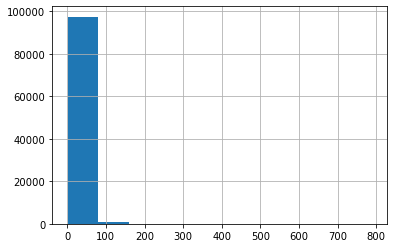

In [17]:
plot_word_number_histogram(df['body'])

In [18]:
# Average word length histogram for each sentence
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

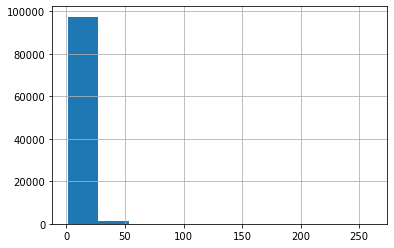

In [19]:
plot_word_length_histogram(df['body'])

## NLTK

In [20]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Plot Top Stopwords Barchart
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

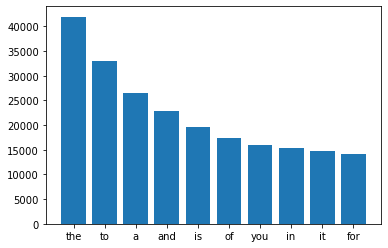

In [22]:
plot_top_stopwords_barchart(df['body'])

In [23]:
# Top Non-Stopwords Barchart
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

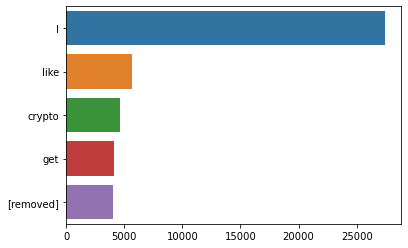

In [24]:
plot_top_non_stopwords_barchart(df['body'])

## Ngram Exploration

In [25]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

In [26]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

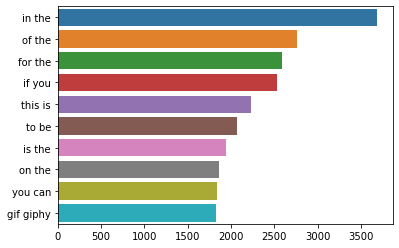

In [27]:
plot_top_ngrams_barchart(df['body'],2)

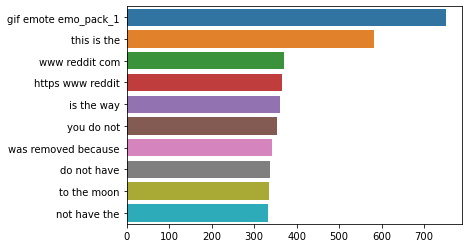

In [28]:
plot_top_ngrams_barchart(df['body'],3)

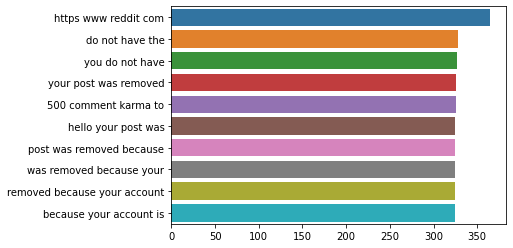

In [29]:
plot_top_ngrams_barchart(df['body'],4)

## Topic Modeling Exploration with pyLDAvis

In [30]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis
import pyLDAvis.gensim_models

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
    return vis

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
df2 = df

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
lda_model, bow_corpus, dic = get_lda_objects(df2['body'])

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
lda_model.show_topics()

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.023*"ETH" + 0.012*"BTC" + 0.011*"buy" + 0.009*"day" + 0.009*"back" + 0.007*"time" + 0.007*"DCA" + 0.007*"get" + 0.007*"see" + 0.006*"bought"'),
 (1,
  '0.030*"gif" + 0.016*"This" + 0.012*"What" + 0.011*"You" + 0.011*"Thanks" + 0.010*"bill" + 0.010*"man" + 0.010*"Good" + 0.009*"tax" + 0.008*"love"'),
 (2,
  '0.018*"n\'t" + 0.014*"crypto" + 0.012*"like" + 0.010*"people" + 0.009*"money" + 0.009*"would" + 0.008*"think" + 0.008*"one" + 0.008*"get" + 0.007*"know"'),
 (3,
  '0.047*"removed" + 0.046*"moon" + 0.034*"post" + 0.023*"deleted" + 0.020*"comment" + 0.015*"http" + 0.011*"day" + 0.011*"karma" + 0.010*"Moons" + 0.009*"old"')]

In [35]:
plot_lda_vis(lda_model, bow_corpus, dic)

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.194157  0.055212       1        1  53.556992
0     -0.181816  0.096895       2        1  21.323716
1      0.066545 -0.310450       3        1  12.860537
3      0.309428  0.158343       4        1  12.258755, topic_info=         Term         Freq        Total Category  logprob  loglift
132   removed  4226.000000  4226.000000  Default  30.0000  30.0000
826      moon  4123.000000  4123.000000  Default  29.0000  29.0000
390      post  3073.000000  3073.000000  Default  28.0000  28.0000
334       gif  2790.000000  2790.000000  Default  27.0000  27.0000
29        ETH  3582.000000  3582.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
139       day  1016.169004  2876.924640   Topic4  -4.4757   1.0582
2386      bot   395.374743   525.209563   Topic4  -5.4197   1.8150
379      make   757.582334  2981.814151   Topic4  -4.7694   0.7288
332      vote   399.841754   693.969022   Topic4  -5.4084   1.5476
523       get   451.760033  4493.591834   Topic4  -5.2863  -0.1983

[227 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
252       1  0.884529    're
252       2  0.014941    're
252       3  0.094429    're
252       4  0.005977    're
90        1  0.631430    ...
...     ...       ...    ...
2113      3  0.997300  x200B
39        1  0.991057   year
39        2  0.008874   year
1008      1  0.488018    yes
1008      3  0.510676    yes

[295 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4])

## Wordcloud

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


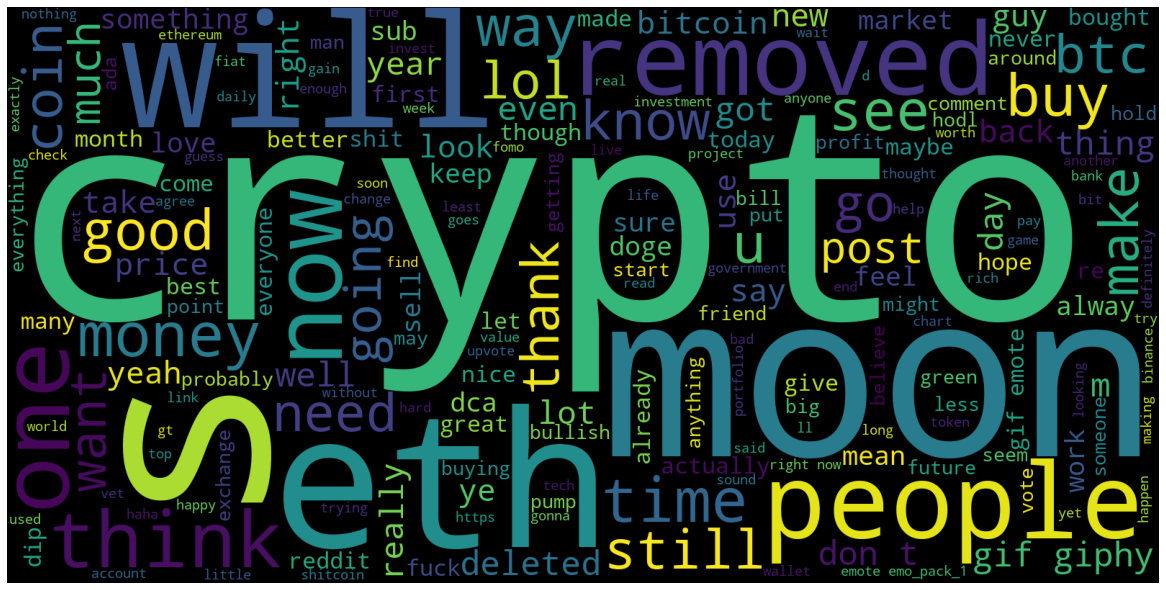

In [36]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df2.body:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Sentiment Analysis

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

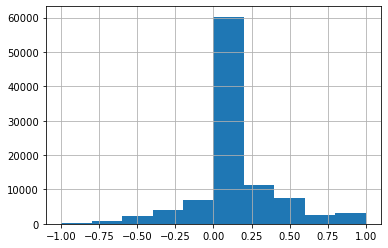

In [37]:
from textblob import TextBlob

# Polarity Histogram
def polarity(text):
    return TextBlob(text).sentiment.polarity

df2['polarity_score']=df2['body'].\
   apply(lambda x : polarity(x))
df2['polarity_score'].hist()

Majority of comments are neutral

## Sentiment Barchart

In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'neg'
        elif x==0:
            return 'neu'
        else:
            return 'pos'

def plot_sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User1\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


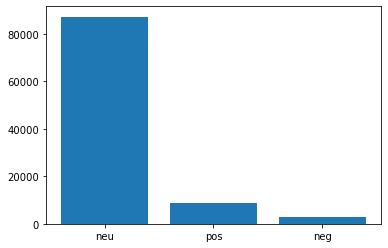

In [39]:
plot_sentiment_barchart(df2['body'], method='Vader')

## Sentiment Analysis with Vader

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
analyser = SentimentIntensityAnalyzer()

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
# function to calculate polarity scores
pol = lambda x: analyser.polarity_scores(x)

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
clean_df = df
clean_df.head()

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,author,author_fullname,author_premium,body,collapsed_reason_code,comment_type,created_utc,score,id,parent_id,permalink,polarity_score
0,HiCarumba,t2_95jx76vi,False,Yes Brother. This is the way.,NaN,NaN,1628333279,1,h81jxny,t1_h81jvaa,/r/CryptoCurrency/comments/ozr28z/it_was_proph...,0.000000
1,baeiby,t2_7htt0be3,False,"Lol to be very honest, I knew close to zilch a...",NaN,NaN,1628333279,2,h81jxnr,t1_h81jn5u,/r/CryptoCurrency/comments/ozqz9m/i_trust_peop...,0.469375
2,NotRyanPace,t2_xgk0k,False,"End of year, take the ""Last call for ETH under...",NaN,NaN,1628333278,1,h81jxmq,t1_h81jqki,/r/CryptoCurrency/comments/ozinnf/daily_discus...,-0.044444
3,BountyManagerBD,t2_8nbdzghw,False,ESCROW PROTOCOL are aiming to attract users fr...,NaN,NaN,1628333277,1,h81jxlg,t3_o2e67b,/r/CryptoCurrency/comments/o2e67b/escrow_proto...,0.000000
4,Gabus_Bego,t2_bbs0wmdt,False,"Thank you, my dude.",NaN,NaN,1628333276,1,h81jxk6,t1_h81jtfb,/r/CryptoCurrency/comments/ozinnf/daily_discus...,0.000000


In [44]:
clean_df = clean_df[clean_df['body'].str.contains('Bitcoin|BTC', case=False)]
clean_df.head()

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,author,author_fullname,author_premium,body,collapsed_reason_code,comment_type,created_utc,score,id,parent_id,permalink,polarity_score
6,atomwest314,t2_x50okt,True,i noticed this too peeps like 'o wow ICP go up...,NaN,NaN,1628333275,3,h81jxhz,t3_ozr2hx,/r/CryptoCurrency/comments/ozr2hx/can_we_pleas...,0.266667
23,Shrappy16,t2_4e2hp2d0,False,Probably know the answer: If you earned enough...,NaN,NaN,1628333265,1,h81jx4f,t3_oznwv4,/r/CryptoCurrency/comments/oznwv4/eth_just_com...,0.000000
29,Odd_Copy_8077,t2_ajd0894j,False,A boy asked his bitcoin-investing dad for 1 bi...,NaN,NaN,1628333261,4,h81jwxn,t1_h81jr69,/r/CryptoCurrency/comments/ozinnf/daily_discus...,0.000000
91,Much-Weekend-8882,t2_66sa37r1,False,Is this all time high of eth/btc ratio?,NaN,NaN,1628333204,2,h81juiz,t3_ozinnf,/r/CryptoCurrency/comments/ozinnf/daily_discus...,0.160000
114,itsglocx,t2_c3slvp4i,False,can you imagine being mad at bitcoin going dow...,NaN,NaN,1628341913,1,h81wcat,t3_ozsz9f,/r/CryptoCurrency/comments/ozsz9f/a_snapshot_i...,-0.193519


In [45]:
clean_df.shape

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3716, 12)

In [46]:
# creating new column 'polarity' in clean_df
clean_df['polarity'] = clean_df['body'].apply(pol)

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
# checking that worked
clean_df.head()

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,author,author_fullname,author_premium,body,collapsed_reason_code,comment_type,created_utc,score,id,parent_id,permalink,polarity_score,polarity
6,atomwest314,t2_x50okt,True,i noticed this too peeps like 'o wow ICP go up...,NaN,NaN,1628333275,3,h81jxhz,t3_ozr2hx,/r/CryptoCurrency/comments/ozr2hx/can_we_pleas...,0.266667,"{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'comp..."
23,Shrappy16,t2_4e2hp2d0,False,Probably know the answer: If you earned enough...,NaN,NaN,1628333265,1,h81jx4f,t3_oznwv4,/r/CryptoCurrency/comments/oznwv4/eth_just_com...,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
29,Odd_Copy_8077,t2_ajd0894j,False,A boy asked his bitcoin-investing dad for 1 bi...,NaN,NaN,1628333261,4,h81jwxn,t1_h81jr69,/r/CryptoCurrency/comments/ozinnf/daily_discus...,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
91,Much-Weekend-8882,t2_66sa37r1,False,Is this all time high of eth/btc ratio?,NaN,NaN,1628333204,2,h81juiz,t3_ozinnf,/r/CryptoCurrency/comments/ozinnf/daily_discus...,0.160000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
114,itsglocx,t2_c3slvp4i,False,can you imagine being mad at bitcoin going dow...,NaN,NaN,1628341913,1,h81wcat,t3_ozsz9f,/r/CryptoCurrency/comments/ozsz9f/a_snapshot_i...,-0.193519,"{'neg': 0.104, 'neu': 0.697, 'pos': 0.199, 'co..."


In [48]:
# dropping unessential columns and seperating out 'polarity' dictionary
df3 = pd.concat([clean_df.drop(['author_fullname'], axis=1), clean_df['polarity'].apply(pd.Series)], axis=1)

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
df3.head()

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,author,author_premium,body,collapsed_reason_code,comment_type,created_utc,score,id,parent_id,permalink,polarity_score,polarity,neg,neu,pos,compound
6,atomwest314,True,i noticed this too peeps like 'o wow ICP go up...,NaN,NaN,1628333275,3,h81jxhz,t3_ozr2hx,/r/CryptoCurrency/comments/ozr2hx/can_we_pleas...,0.266667,"{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'comp...",0.000,0.759,0.241,0.9013
23,Shrappy16,False,Probably know the answer: If you earned enough...,NaN,NaN,1628333265,1,h81jx4f,t3_oznwv4,/r/CryptoCurrency/comments/oznwv4/eth_just_com...,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
29,Odd_Copy_8077,False,A boy asked his bitcoin-investing dad for 1 bi...,NaN,NaN,1628333261,4,h81jwxn,t1_h81jr69,/r/CryptoCurrency/comments/ozinnf/daily_discus...,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
91,Much-Weekend-8882,False,Is this all time high of eth/btc ratio?,NaN,NaN,1628333204,2,h81juiz,t3_ozinnf,/r/CryptoCurrency/comments/ozinnf/daily_discus...,0.160000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
114,itsglocx,False,can you imagine being mad at bitcoin going dow...,NaN,NaN,1628341913,1,h81wcat,t3_ozsz9f,/r/CryptoCurrency/comments/ozsz9f/a_snapshot_i...,-0.193519,"{'neg': 0.104, 'neu': 0.697, 'pos': 0.199, 'co...",0.104,0.697,0.199,0.4404


In [50]:
# new dataframe with average polarity score for each label
scores_df = pd.DataFrame()
scores_df['avg_positive'] = df3['pos'].mean()
scores_df['avg_neutral'] = df3['neu'].mean()
scores_df['avg_negative'] = df3['neg'].mean()
scores_df['avg_compound'] = df3['compound'].mean()

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
scores_df.head()

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,avg_positive,avg_neutral,avg_negative,avg_compound


In [52]:
# print average polarity score for each label
print('The average Positive score = ' + str(df3['pos'].mean()))
print('The average Neutral score = ' + str(df3['neu'].mean()))
print('The average Negative score = ' + str(df3['neg'].mean()))
print('The average Compound score = ' + str(df3['compound'].mean()))

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The average Positive score = 0.1009709364908503
The average Neutral score = 0.8521111410118416
The average Negative score = 0.04691872981700745
The average Compound score = 0.1707172228202371


In [53]:
# counting unique values
u = len(pd.unique(df2['author']))
  
print("Number of unique values :", u)

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of unique values : 11312


In [54]:
# Count unique calues in each column
print(df2['author'].value_counts())

[deleted]               6117
SnoewZ                   580
Obito_DOS3               528
ccModBot                 465
Too_raw90                414
                        ... 
Noxidy                     1
Maximum_Ad_8241            1
King_Esot3ric              1
Dazzling_Formal_6756       1
sue_wue                    1
Name: author, Length: 11312, dtype: int64


C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
